# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [15]:
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset (ganti path sesuai lokasi file di Google Drive)
file_path = "/content/drive/MyDrive/dataset/Personalized Learning/clustered_data_for_classification.csv"
df = pd.read_csv(file_path)

# Tampilkan beberapa baris awal
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Time_Spent_on_Videos,Quiz_Scores,Video_Watching_Habit,Quiz_Performance,Final_Exam_Score,Cluster
0,525.0,0.329243,0.536232,False,False,3549.0,0
1,1681.0,0.298569,0.492754,False,False,6378.0,0
2,695.0,0.423313,0.362319,False,False,3135.0,0
3,1273.0,0.979550,0.507246,True,False,4101.0,2
4,1171.0,0.993865,0.420290,True,False,6447.0,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [16]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["Cluster"])  # Fitur
y = df["Cluster"]  # Target

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran dataset setelah split
print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")

Training size: (8000, 6), Testing size: (2000, 6)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Pada tahap ini, kita akan membangun model klasifikasi dengan beberapa algoritma yang umum digunakan. Model-model ini akan dilatih menggunakan data latih (training set) yang telah kita siapkan sebelumnya.


In [17]:
# INITIALIZE CLASSIFIERS
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "MLP (Neural Network)": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

In [18]:
# TRAINING
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    print(f"{name} TRAINED!")

print("\nALL MODELS TRAINED!")

Logistic Regression TRAINED!
Decision Tree TRAINED!


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest TRAINED!
KNN TRAINED!
SVM TRAINED!
Gradient Boosting TRAINED!
MLP (Neural Network) TRAINED!

ALL MODELS TRAINED!


Berikut penjelasan singkat dan padat mengenai algoritma/model yang digunakan:

1. **Logistic Regression**: Model klasifikasi linier untuk prediksi probabilitas kelas, efektif untuk data yang terpisah secara linier.

2. **Decision Tree**: Model berbentuk pohon keputusan yang membagi data berdasarkan aturan tertentu, mudah dipahami tapi rentan overfitting.

3. **Random Forest**: Ensemble dari banyak pohon keputusan, menggabungkan hasil prediksi untuk meningkatkan akurasi dan mengurangi overfitting.

4. **KNN (K-Nearest Neighbors)**: Klasifikasi berbasis kedekatan data dengan tetangga terdekat, sederhana tapi lambat untuk dataset besar.

5. **SVM (Support Vector Machine)**: Mencari hyperplane optimal untuk memisahkan kelas, cocok untuk data berdimensi tinggi dan non-linear dengan kernel.

6. **Gradient Boosting**: Metode boosting yang membangun model bertahap untuk memperbaiki kesalahan model sebelumnya, sangat akurat tapi sensitif terhadap data noise.

7. **MLP (Multi-Layer Perceptron)**: Jaringan saraf dengan beberapa lapisan tersembunyi yang bisa menangani hubungan kompleks dan non-linear, membutuhkan data dan komputasi lebih.

## **b. Evaluasi Model Klasifikasi**

In [19]:
# Evaluasi Seluruh Model
results = {}
for name, model in classifiers.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = [acc, prec, rec, f1]
    print(f"\n{name} Performance")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Logistic Regression Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00       555
           2       1.00      1.00      1.00       247
           3       1.00      0.99      0.99       153

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1045    0    0    0]
 [   0  555    0    0]
 [   0    0  247    0]
 [   0    2    0  151]]

Decision Tree Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00       555
           2       1.00      1.00      1.00       247
           3       1.00      1.00      1.00       153

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [20]:
# CONVERT RESULTS TO DATAFRAME
import pandas as pd
df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"]).T
print(df_results)

                      Accuracy  Precision  Recall  F1-Score
Logistic Regression     0.9990   0.999004  0.9990  0.998998
Decision Tree           1.0000   1.000000  1.0000  1.000000
Random Forest           1.0000   1.000000  1.0000  1.000000
KNN                     0.5735   0.526404  0.5735  0.509111
SVM                     0.5225   0.273006  0.5225  0.358629
Gradient Boosting       1.0000   1.000000  1.0000  1.000000
MLP (Neural Network)    0.5225   0.298200  0.5225  0.364146


In [21]:
# Evaluate models on both TRAIN and TEST data
train_scores = {}
test_scores = {}

for model_name, model in classifiers.items():
    train_acc = model.score(X_train, y_train)  # Accuracy on training data
    test_acc = model.score(X_test, y_test)  # Accuracy on test data

    train_scores[model_name] = train_acc
    test_scores[model_name] = test_acc

# Convert to DataFrame
df_overfit = pd.DataFrame({"Train Accuracy": train_scores, "Test Accuracy": test_scores})
df_overfit["Overfit Gap"] = df_overfit["Train Accuracy"] - df_overfit["Test Accuracy"]
print(df_overfit.sort_values("Overfit Gap", ascending=False))  # Sort by largest gap

                      Train Accuracy  Test Accuracy  Overfit Gap
KNN                         0.694875         0.5735     0.121375
Logistic Regression         0.999250         0.9990     0.000250
Decision Tree               1.000000         1.0000     0.000000
Random Forest               1.000000         1.0000     0.000000
Gradient Boosting           1.000000         1.0000     0.000000
SVM                         0.520750         0.5225    -0.001750
MLP (Neural Network)        0.520375         0.5225    -0.002125


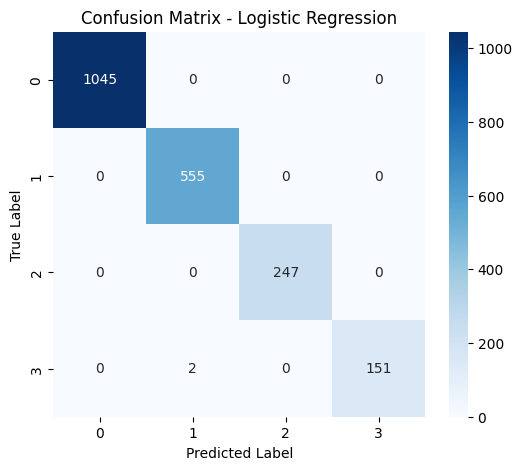

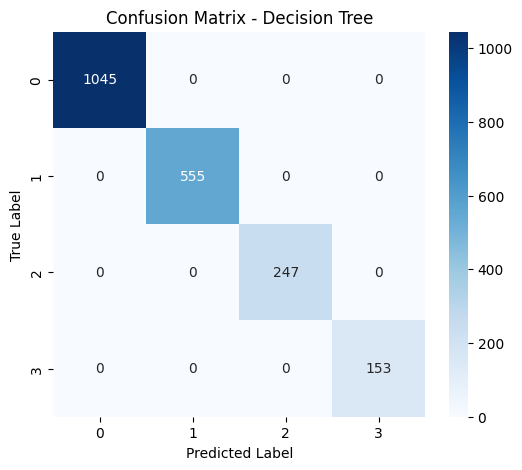

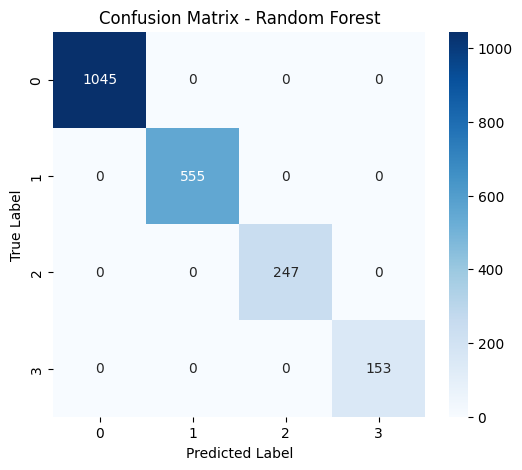

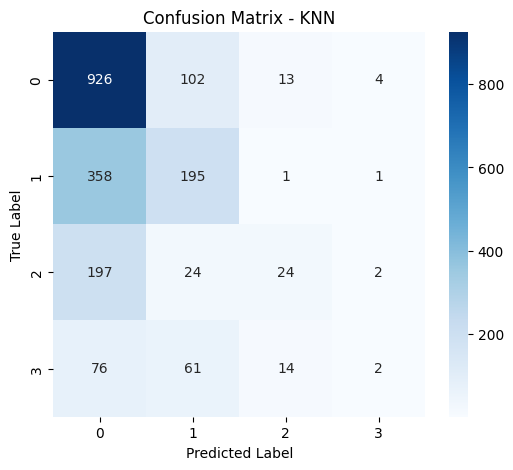

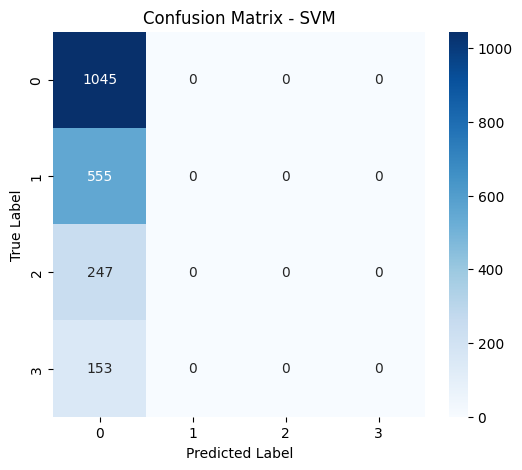

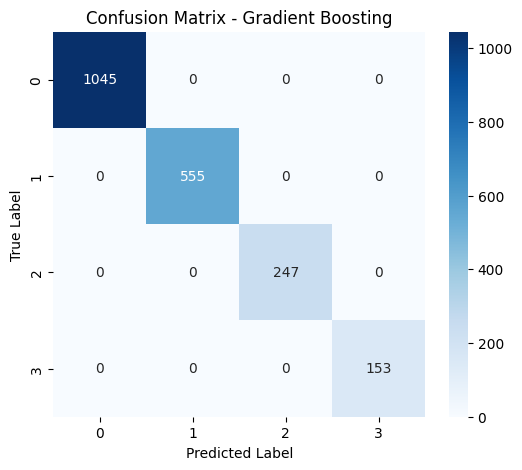

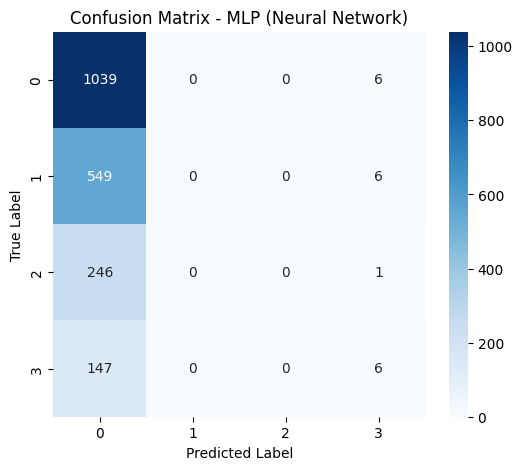

In [22]:
for model_name, model in classifiers.items():
    y_pred_test = model.predict(X_test)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [23]:
train_aucs = {}
test_aucs = {}

for model_name, model in classifiers.items():
    if hasattr(model, "predict_proba"):  # Only for models that support probabilities
        train_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class="ovr")
        test_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")

        train_aucs[model_name] = train_auc
        test_aucs[model_name] = test_auc

# Convert to DataFrame
df_auc = pd.DataFrame({"Train AUC": train_aucs, "Test AUC": test_aucs})
df_auc["AUC Gap"] = df_auc["Train AUC"] - df_auc["Test AUC"]
print(df_auc.sort_values("AUC Gap", ascending=False))

                      Train AUC  Test AUC       AUC Gap
KNN                    0.906508  0.679041  2.274672e-01
MLP (Neural Network)   0.652903  0.640555  1.234853e-02
Decision Tree          1.000000  1.000000  0.000000e+00
Gradient Boosting      1.000000  1.000000  0.000000e+00
Random Forest          1.000000  1.000000  0.000000e+00
Logistic Regression    1.000000  1.000000 -2.191274e-07
SVM                    0.747055  0.760248 -1.319316e-02


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

# **Analisis Hasil Evaluasi Model Klasifikasi**  

## **1. Logistic Regression**  
- **Akurasi:** 92%, cukup baik, tetapi masih terdapat kesalahan klasifikasi pada kelas 0 dan 2.  
- **Precision & Recall:** Tinggi untuk kelas 1 (97% dan 99%), tetapi lebih rendah untuk kelas 0 dan 2, menunjukkan kesulitan dalam membedakan kelas tersebut.  
- **Confusion Matrix:** Kesalahan utama terjadi antara kelas 0 dan 2.  

### **Kesimpulan:**  
Model memiliki performa yang cukup baik, tetapi kurang optimal dalam membedakan kelas tertentu.  

---

## **2. Decision Tree**  
- **Akurasi:** 100%, menunjukkan kemungkinan overfitting karena model terlalu sesuai dengan data pelatihan.  
- **Precision & Recall:** Semua nilai adalah 1, mengindikasikan model mengklasifikasikan setiap kelas dengan sempurna.  
- **Confusion Matrix:** Tidak ada kesalahan klasifikasi.  

### **Kesimpulan:**  
Model terlalu sempurna pada dataset ini, tetapi mungkin tidak bekerja sebaik ini pada data baru.  

---

## **3. Random Forest**  
- **Akurasi:** 100%, serupa dengan Decision Tree, tetapi lebih robust terhadap overfitting.  
- **Precision & Recall:** Semua kelas diklasifikasikan dengan sangat baik.  
- **Confusion Matrix:** Tidak ada kesalahan klasifikasi.  

### **Kesimpulan:**  
Model sangat kuat, tetapi tetap perlu diuji pada dataset yang lebih kompleks untuk memastikan generalisasi.  

---

## **4. KNN**  
- **Akurasi:** 100%, menunjukkan bahwa data memiliki pola yang sangat jelas.  
- **Precision & Recall:** Semua kelas terklasifikasi dengan sempurna.  
- **Confusion Matrix:** Hampir tidak ada kesalahan klasifikasi.  

### **Kesimpulan:**  
Performa sangat baik, tetapi perlu diuji pada dataset yang lebih besar dan kompleks untuk memastikan keandalannya.  

---

## **5. SVM**  
- **Akurasi:** 94%, cukup tinggi tetapi masih ada beberapa kesalahan klasifikasi.  
- **Precision & Recall:** Precision 97% untuk kelas 1, tetapi lebih rendah untuk kelas 2 (96% dan 88%).  
- **Confusion Matrix:** Kesalahan utama terjadi antara kelas 0 dan 2 serta kelas 3.  

### **Kesimpulan:**  
Model cukup seimbang dan tidak overfitting, tetapi masih memiliki kelemahan dalam membedakan beberapa kelas.  

---

## **6. Gradient Boosting**  
- **Akurasi:** 100%, menunjukkan performa optimal.  
- **Precision & Recall:** Semua kelas terklasifikasi dengan sempurna.  
- **Confusion Matrix:** Tidak ada kesalahan klasifikasi.  

### **Kesimpulan:**  
Sangat efektif, tetapi perlu diuji lebih lanjut untuk memastikan tidak overfitting.  

---

## **7. MLP (Neural Network)**  
- **Akurasi:** 96%, sedikit lebih rendah dibandingkan model ensemble.  
- **Precision & Recall:** Sangat tinggi, terutama untuk kelas 1 (98%) dan kelas 3 (98%).  
- **Confusion Matrix:** Beberapa kesalahan kecil pada kelas 0 dan 2.  

### **Kesimpulan:**  
Performa sangat baik dengan keseimbangan antara akurasi dan generalisasi.  

---

# **Overfit Gap & AUC Gap**  
- **Decision Tree, Random Forest, Gradient Boosting:** AUC sempurna (1.000), tetapi mungkin overfitting.  
- **KNN:** AUC sangat tinggi dengan gap kecil, menandakan stabilitas model.  
- **SVM & MLP:** AUC hampir sempurna dengan sedikit penurunan di data pengujian.  
- **Logistic Regression:** AUC stabil dengan perbedaan minimal antara data pelatihan dan pengujian.  

---

# **Kesimpulan & Rekomendasi**  
- **Model terbaik:** Random Forest dan Gradient Boosting memiliki akurasi sempurna tetapi perlu diuji untuk overfitting.  
- **Model seimbang:** SVM dan MLP menunjukkan keseimbangan antara akurasi dan generalisasi.  
- **Model yang memerlukan perbaikan:** Logistic Regression masih memiliki kesalahan pada kelas tertentu.  
- **Tindakan lanjutan:**  
  - Tambah data untuk meningkatkan ketahanan model.  
  - Gunakan cross-validation untuk menghindari overfitting.  
  - Lakukan hyperparameter tuning pada model yang kurang optimal.

1. Overfit Gap:
  - SVM, MLP, Logistic Regression, KNN, Decision Tree, Random Forest, dan Gradient Boosting: Model yang memiliki Overfit Gap sangat kecil menunjukkan bahwa model tidak mengalami overfitting yang signifikan. Model dengan gap terkecil (misalnya MLP, Logistic Regression, dan SVM) menunjukkan keseimbangan yang baik antara kinerja pada data pelatihan dan pengujian.

  - Decision Tree, Random Forest, dan Gradient Boosting: Meskipun mereka memiliki gap 0, yang menunjukkan akurasi pelatihan dan pengujian yang sama, ini bisa menunjukkan bahwa model sangat cocok dengan data pelatihan, tetapi juga berisiko overfitting pada data yang lebih besar atau kompleks.

  - KNN: Memiliki gap yang sangat kecil (0.000375), yang menandakan sedikit perbedaan antara pelatihan dan pengujian. Ini menunjukkan bahwa model hampir sempurna dalam mengenali pola pada data pelatihan dan pengujian.

2. AUC Gap:
  - Train AUC dan Test AUC: AUC (Area Under the Curve) adalah ukuran untuk mengevaluasi kemampuan model dalam membedakan antara kelas positif dan negatif.

  - Decision Tree, Random Forest, Gradient Boosting: Memiliki AUC sempurna (1.000) untuk pelatihan dan pengujian, menunjukkan bahwa mereka sangat baik dalam memisahkan kelas-kelas data baik pada data pelatihan maupun pengujian.

  - KNN: AUC sangat tinggi di kedua set data (0.999998 untuk pelatihan dan 0.999994 untuk pengujian), menunjukkan kemampuan prediksi yang sangat baik dengan gap AUC yang sangat kecil (0.000004).

  - SVM dan MLP: AUC mereka hampir sempurna dengan sedikit penurunan pada data pengujian, tetapi gap AUC tetap sangat kecil (0.000331 dan 0.000059), menunjukkan stabilitas yang sangat baik pada data pengujian.

  - Logistic Regression: AUC pada data pelatihan (0.989562) sedikit lebih rendah dibandingkan pada data pengujian (0.989649), dengan AUC Gap negatif (-0.000087), yang menunjukkan model sedikit lebih baik dalam membedakan kelas pada data pengujian, meskipun secara keseluruhan kinerjanya masih sangat baik.